## Data Source :

retrieved from https://www.kaggle.com/datasets/sohamghag/student-logistic-regression-dataset

### Relevant Libraries 

In [6]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
sns.set()

## EDA

In [7]:
raw_data = pd.read_csv('students_with_placement.csv')
raw_data

,Student_ID,IQ,CGPA,Placement
0,1,133,7.55,Yes
1,2,126,9.74,Yes
2,3,110,7.17,Yes
3,4,87,5.92,No
4,5,138,7.84,Yes
...,...,...,...,...
495,496,106,6.64,Yes
496,497,82,8.29,No
497,498,92,5.24,Yes
498,499,96,7.36,Yes


In [8]:
raw_data.drop(['Student_ID'],axis=1,inplace=True)

In [9]:
raw_data.describe(include = 'all')


,IQ,CGPA,Placement
count,500.000000,500.000000,500
unique,NaN,NaN,2
top,NaN,NaN,No
freq,NaN,NaN,253
mean,119.970000,7.559840,NaN
std,23.706478,1.482335,NaN
min,80.000000,5.010000,NaN
25%,99.000000,6.280000,NaN
50%,121.000000,7.500000,NaN
75%,141.000000,8.950000,NaN


In [20]:
raw_data['Placement']=raw_data['Placement'].map({'Yes':1,'No':0})

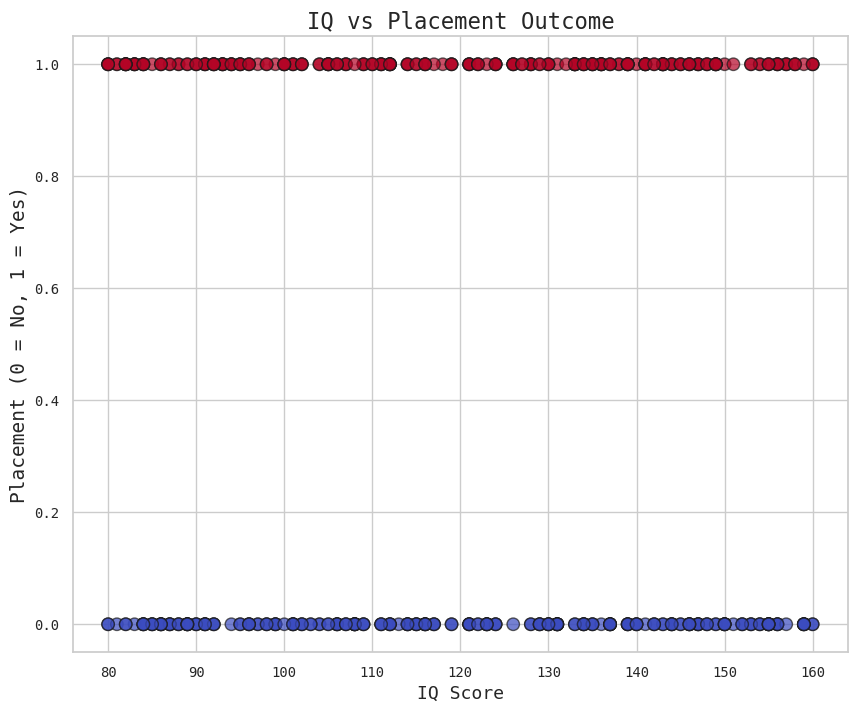

In [22]:

sns.set(style="whitegrid")
plt.rcParams['font.family'] = 'monospace'
plt.figure(figsize=(10, 8))

plt.scatter(
    raw_data['IQ'],
    raw_data['Placement'],
      c= raw_data['Placement'],     
    cmap='coolwarm',                 
    s=80,                            
    edgecolors='k',                  
    alpha=0.7                      
)
plt.title('IQ vs Placement Outcome', fontsize=16)
plt.xlabel('IQ Score', fontsize=13)
plt.ylabel('Placement (0 = No, 1 = Yes)', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.show()


## Declare Independent and Dependent Variables

In [23]:
new_data = raw_data.copy()


In [24]:
x1 = new_data[['IQ','CGPA']]
y = new_data['Placement']

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.3, random_state=365)


In [26]:
x1= sm.add_constant(x_train)
reg_log = sm.Logit(y_train,x1)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.693052
         Iterations 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Placement   No. Observations:                  350
Model:                          Logit   Df Residuals:                      347
Method:                           MLE   Df Model:                            2
Date:                Tue, 15 Jul 2025   Pseudo R-squ.:               4.317e-05
Time:                        10:26:15   Log-Likelihood:                -242.57
converged:                       True   LL-Null:                       -242.58
Covariance Type:            nonrobust   LLR p-value:                    0.9896
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0004      0.723     -0.001      1.000      -1.418       1.417
IQ            -0.0006      0.005     -0.129      0.898      -0.010       0.008
CGPA           0.0064      0.074      0.087      0.930      -0.138       0.151
==============================================================================
"""

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Model
model = LogisticRegression()
model.fit(x_train, y_train)

# # Prediction
y_pred = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Accuracy: 0.47333333333333333
Intercept: [0.00041171]
Coefficients: [[-0.0005959   0.00637356]]


In [28]:
results_log.pred_table()

array([[167.,  10.],
       [159.,  14.]])

In [29]:
results_log.predict()

array([0.48971837, 0.48980447, 0.4917035 , 0.49130162, 0.48957667,
       0.49067585, 0.49389155, 0.49029908, 0.49334696, 0.48794255,
       0.49192512, 0.49727978, 0.49559044, 0.49304243, 0.49176003,
       0.49960517, 0.49368592, 0.49323125, 0.49416903, 0.50214511,
       0.48860421, 0.49220648, 0.49345702, 0.49593842, 0.48466337,
       0.50182049, 0.49717695, 0.48986501, 0.49920271, 0.49220257,
       0.49864779, 0.49486332, 0.49059584, 0.49670876, 0.4991259 ,
       0.49275725, 0.49405332, 0.48877535, 0.48838921, 0.48858429,
       0.4877675 , 0.49647431, 0.4973825 , 0.49301906, 0.49908537,
       0.48822589, 0.49567715, 0.49335202, 0.49664277, 0.48950992,
       0.49961795, 0.4983538 , 0.48724584, 0.48862757, 0.49407059,
       0.4943179 , 0.49243202, 0.50143358, 0.49600117, 0.49551652,
       0.49283669, 0.49932489, 0.49887798, 0.49255877, 0.49319302,
       0.49404675, 0.49483546, 0.4936698 , 0.49005517, 0.49750881,
       0.4980536 , 0.50038062, 0.49815804, 0.4899289 , 0.49330

In [30]:
np.array(new_data['Placement'])

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,

In [31]:
cm_df = pd.DataFrame(results_log.pred_table())
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,167.0,10.0
Actual 1,159.0,14.0


In [32]:
cm = np.array(cm_df)
accuracy_train = (cm[0,0]+cm[1,1])/cm.sum()
accuracy_train
print(f' The model showed a {round(accuracy_train*100)} % accuracy when tested with training data ')

 The model showed a 52 % accuracy when tested with training data 



<b> The model performed terribly and is only able to predict not admitted, which is due to an imbalance in the data set as it contains more not admitted target values -0 </b>

### POSSIBLE LINE OF ACTIONS



1. Oversampling the minority class (admitted)
2. Undersampling the majority class (not admitted)
3. Using class weights in logistic regression
4. Test Another Algorithm


In [37]:
x2 = new_data[['IQ','CGPA']]
y1 = new_data['Placement']

### Oversampling the minority class (admitted)

In [40]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report


newx_train, newx_test, newy_train, newy_test = train_test_split(
    x2, y1, test_size=0.2, random_state=365, stratify=y
)
# Apply SMOTE only on training data
smote = SMOTE(random_state=365)
newx_train_res, newy_train_res = smote.fit_resample(newx_train, newy_train)

# Train model on resampled data
model = LogisticRegression(max_iter=1000)
model.fit(newx_train_res, newy_train_res)

newy_pred = model.predict(newx_test)

print(classification_report(newy_test, newy_pred))




              precision    recall  f1-score   support

           0       0.60      0.51      0.55        51
           1       0.56      0.65      0.60        49

    accuracy                           0.58       100
   macro avg       0.58      0.58      0.58       100
weighted avg       0.58      0.58      0.58       100



### 🔍 What This Means

#### ✅ Class 1 (positive class, e.g., “Admitted”)
- **Recall = 0.65*Theour model correctly identifies 65% of all actual positives.
- **Precision = 0.56**: When it predicts “positive,” it’s correct 56% of the timnts).

#### ❌ Class 0
- **Lower recall (0.51)**: The model misses about half of the actual class 0 cases.

#### 📉 Overall Accurly 50/50).
- Suggests the model is struggling to clearly separate 

e classes.



### 🧾 Conclusion

The model did **not perform better** even after oversampling the minority class using SMOTE.  
This suggests that **logistic regression is not well-suited for this particular imbalanced dataset**.

Despite balancing the data, the model struggled to separate the classes effectively, as shown by:
- Modest precision and recall
- Low overall accuracy
- F1-scores indicating weak predictive power

➡️ **Conclusion**: Logistic Regression may not be the best choice for this classification task. A more powerful model (e.g., Random Forest, XGBoost, or SVM) might yield better performance on this imbalanced dataset.
